# ENERPI - LOG info & temperature study

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.display import Image, HTML

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import math
import datetime as dt
import pandas as pd
import numpy as np
import pytz
import matplotlib.dates as mpd
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import signal
from scipy.signal import medfilt
import numexpr as ne
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer, MinMaxScaler, Binarizer
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, Birch, AffinityPropagation
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA, MiniBatchSparsePCA, IncrementalPCA
from hdbscan import HDBSCAN
import statsmodels.api as sm
import random
import os

from enerpi.base import timeit
from enerpi.api import enerpi_data_catalog, enerpi_log
from enerpi.enerplot import write_fig_to_svg, tableau20
from enerpi.sunposition import sun_position
from prettyprinting import *


loginfo = enerpi_log(log_file=os.path.expanduser('~/ENERPIDATA/enerpi_study_temps.log'), extract_temps=True)

                 msg    temp  debug_send  no_red     CPU     GPU
exec tipo                                                       
0    INFO          7       0           0       0       0       0
     WARNING       1       0           0       1       0       0
1    DEBUG     66350   65800           0       0   65934   65934
     INFO         11       0           0       0       0       0
     WARNING       1       0           0       1       0       0
2    DEBUG     53834   53243           0       0   53420   53420
     INFO         11       0           0       0       0       0
     WARNING       1       0           0       1       0       0
3    DEBUG    514132  509842           0       0  511327  511327
     INFO         19       0           0       0       5       5
     WARNING      13       0           0      13       5       5
                     tipo                                                msg  \
ts                                                                         

In [7]:
print_cyan(loginfo.count())
print_yellow(loginfo.tipo.value_counts())
print_magenta(loginfo['exec'].value_counts())

tipo          634380
msg           634380
temp          628885
debug_send         0
no_red            16
exec          634380
CPU           630691
GPU           630691
dtype: int64
DEBUG      634316
INFO           48
WARNING        16
Name: tipo, dtype: int64
3    514164
1     66362
2     53846
0         8
Name: exec, dtype: int64


In [8]:
loginfo[loginfo.tipo == 'WARNING']

,tipo,msg,temp,debug_send,no_red,exec,CPU,GPU
ts,,,,,,,,
2016-09-02 14:01:37,WARNING,ENERPI Logger daemon stopped,NaN,NaN,False,0,NaN,NaN
2016-09-04 21:18:20,WARNING,ENERPI Logger daemon stopped,NaN,NaN,False,1,NaN,NaN
2016-09-06 18:04:39,WARNING,ENERPI Logger daemon stopped,NaN,NaN,False,2,NaN,NaN
2016-09-20 20:12:10,WARNING,OSError: [Errno 101] Network is unreachable; C...,NaN,NaN,False,3,NaN,NaN
2016-09-20 20:12:11,WARNING,OSError: [Errno 101] Network is unreachable; C...,NaN,NaN,False,3,65.5,65.5
2016-09-20 20:12:12,WARNING,OSError: [Errno 101] Network is unreachable; C...,NaN,NaN,False,3,NaN,NaN
2016-09-20 20:12:13,WARNING,OSError: [Errno 101] Network is unreachable; C...,NaN,NaN,False,3,NaN,NaN
2016-09-20 20:12:14,WARNING,OSError: [Errno 101] Network is unreachable; C...,NaN,NaN,False,3,65.0,65.5
2016-09-20 20:12:15,WARNING,OSError: [Errno 101] Network is unreachable; C...,NaN,NaN,False,3,NaN,NaN


In [106]:
temps = loginfo[loginfo.CPU.notnull()].drop(['tipo', 'no_red', 'debug_send'], axis=1)
temps[temps.temp.isnull()].head(10)

,msg,temp,exec,CPU,GPU
ts,,,,,
2016-09-02 15:02:25,# ARCHIVE MONTH --> DATA_YEAR_2016/DATA_2016_M...,NaN,1,69.3,69.8
2016-09-02 15:02:25,# ARCHIVE DAY 2016-09-01 -> CURRENT_MONTH/DATA...,NaN,1,69.3,69.8
2016-09-02 15:02:25,CURRENT_MONTH/TODAY.h5,NaN,1,69.3,69.8
2016-09-02 15:02:25,"STORE ""CURRENT_MONTH/DATA_2016_09_DAY_01.h5"", ...",NaN,1,69.3,69.8
2016-09-02 16:02:51,"STORE ""CURRENT_MONTH/TODAY.h5"", ""('/rms',)""\t-...",NaN,1,72.0,73.1
2016-09-02 16:02:51,TIMEIT _distribute_data TOOK: 0.541 s,NaN,1,72.0,73.1
2016-09-02 16:02:51,Modificando index en archive_periodic: new_sto...,NaN,1,72.0,73.1
2016-09-02 16:02:51,TIMEIT _make_index TOOK: 0.613 s,NaN,1,72.0,73.1
2016-09-02 16:02:51,TIMEIT archive_periodic TOOK: 1.317 s,NaN,1,72.0,73.1


In [14]:
temps.msg.str.slice(0, 9).value_counts()

Tªs --> 6    594614
Tªs --> 7     33046
Tªs --> 5      1222
Size Stor       198
ARCHIVE N       198
STORE "CU       189
CURRENT_M       185
TIMEIT _d       175
Modifican       175
TIMEIT ar       168
TIMEIT up       168
Temporal        168
TIMEIT _m       166
# ARCHIVE         5
** ARCHIV         5
OSError:          5
Tªs --> 8         3
No hay st         1
Name: msg, dtype: int64

## Análisis de temperatura de RPI

                     temp       fecha
ts                                   
2016-09-02 14:01:57  67.7  2016-09-02
2016-09-02 14:02:00  67.1  2016-09-02
2016-09-02 14:02:03  66.6  2016-09-02
2016-09-02 14:02:06  67.7  2016-09-02
2016-09-02 14:02:09  67.1  2016-09-02
         count       mean       std   min   25%   50%   75%   max
temp  634193.0  65.645742  2.613163  56.9  63.9  65.0  66.6  81.1


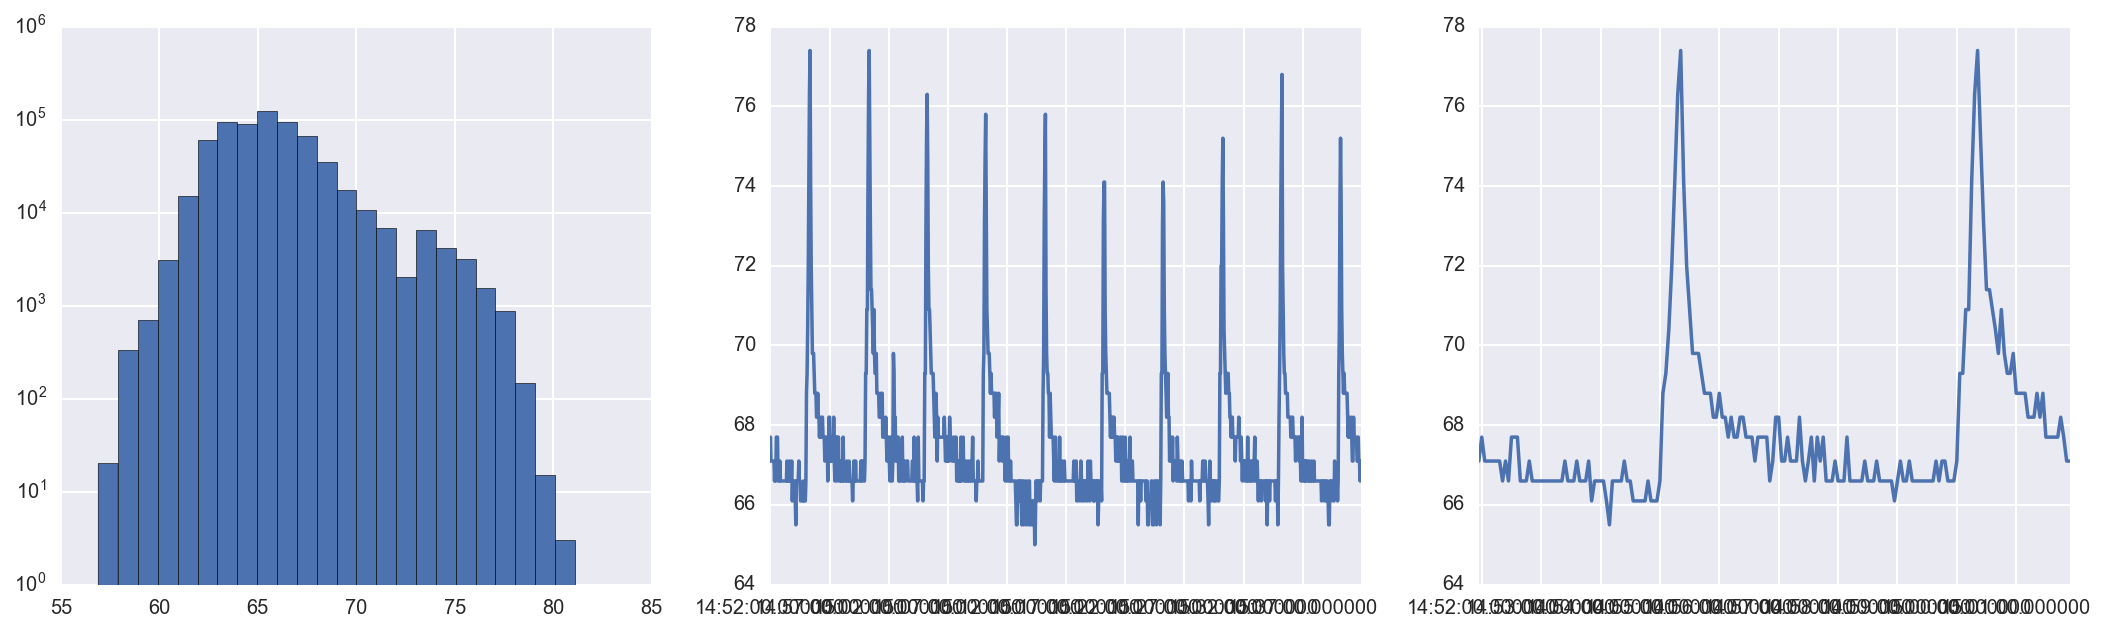

In [266]:
temp_comb = pd.DataFrame(temps[['CPU', 'GPU']].max(axis=1), columns=['temp']).resample('3s').mean().fillna(method='bfill')
temp_comb['fecha'] = temp_comb.index.date
print_info(temp_comb.head())
print_cyan(temp_comb.describe().T)

delta_temp = temp_comb.temp.max() - temp_comb.temp.min()
sample_temps = temp_comb.temp.iloc[1000:2000]

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(temp_comb.temp, bins=int(round(delta_temp)), log=True)
plt.subplot(1, 3, 2)
plt.plot(sample_temps);
plt.subplot(1, 3, 3)
plt.plot(sample_temps.iloc[:200]);

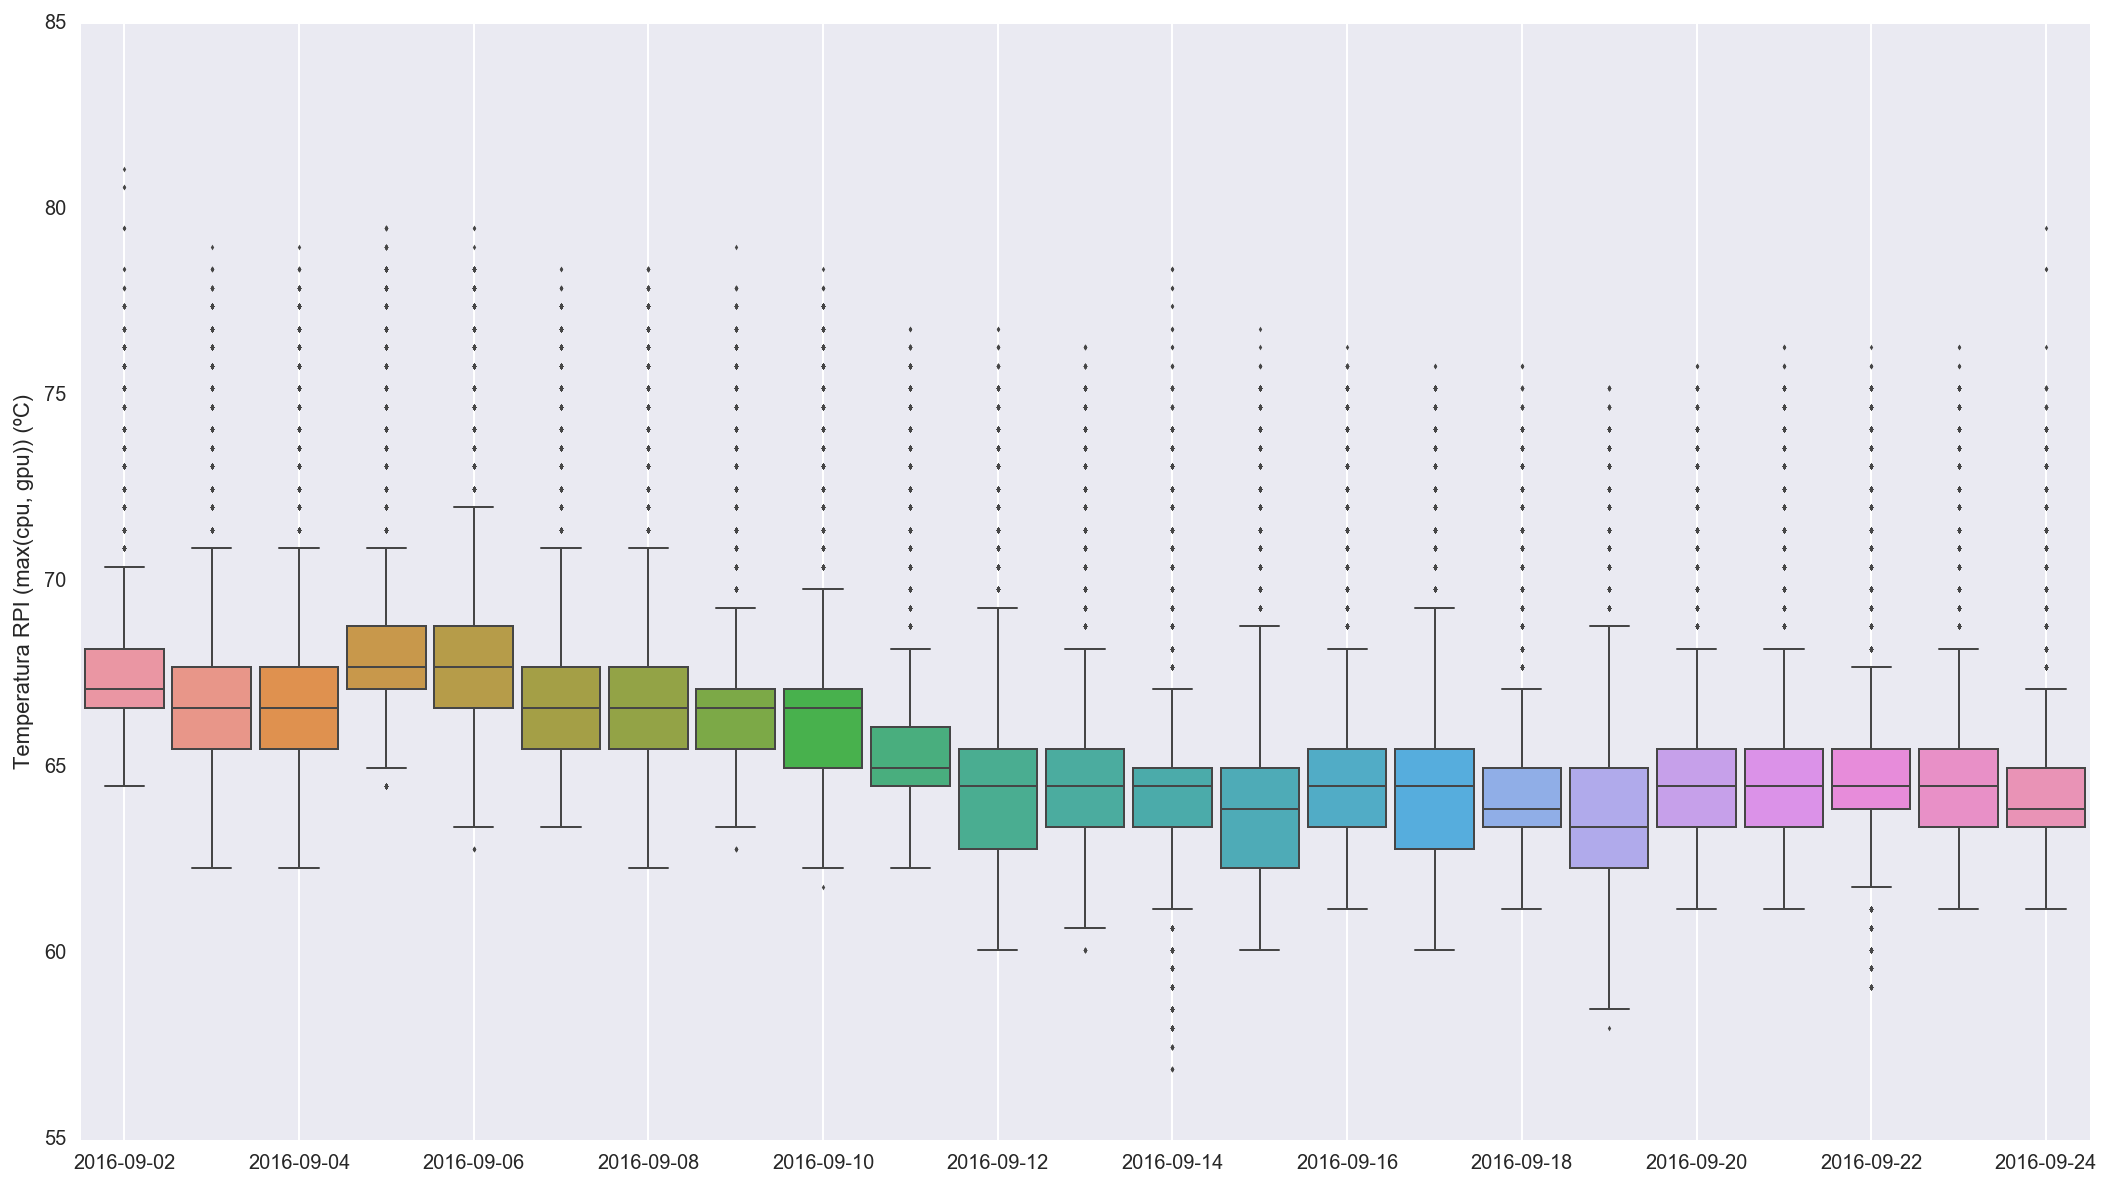

In [267]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(x='fecha', y='temp', data=temp_comb, width=.9, fliersize=2, linewidth=1)
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()
ax.set_xticks(xticks[::2])
ax.set_xticklabels(xticklabels[::2])
ax.grid()
ax.set_xlabel('')
ax.set_ylabel('Temperatura RPI (max(cpu, gpu)) (ºC)');

### FFT de temperatura

-33.0 9953


,ampl,freq
33,6980.719190,33.0
2,4073.364886,2.0
100,3993.367871,100.0
67,3832.628041,67.0
133,3197.487920,133.0
5,3101.436724,5.0
1,3082.544919,1.0
3,2963.401263,3.0
6,2896.853961,6.0
66,2851.718262,66.0


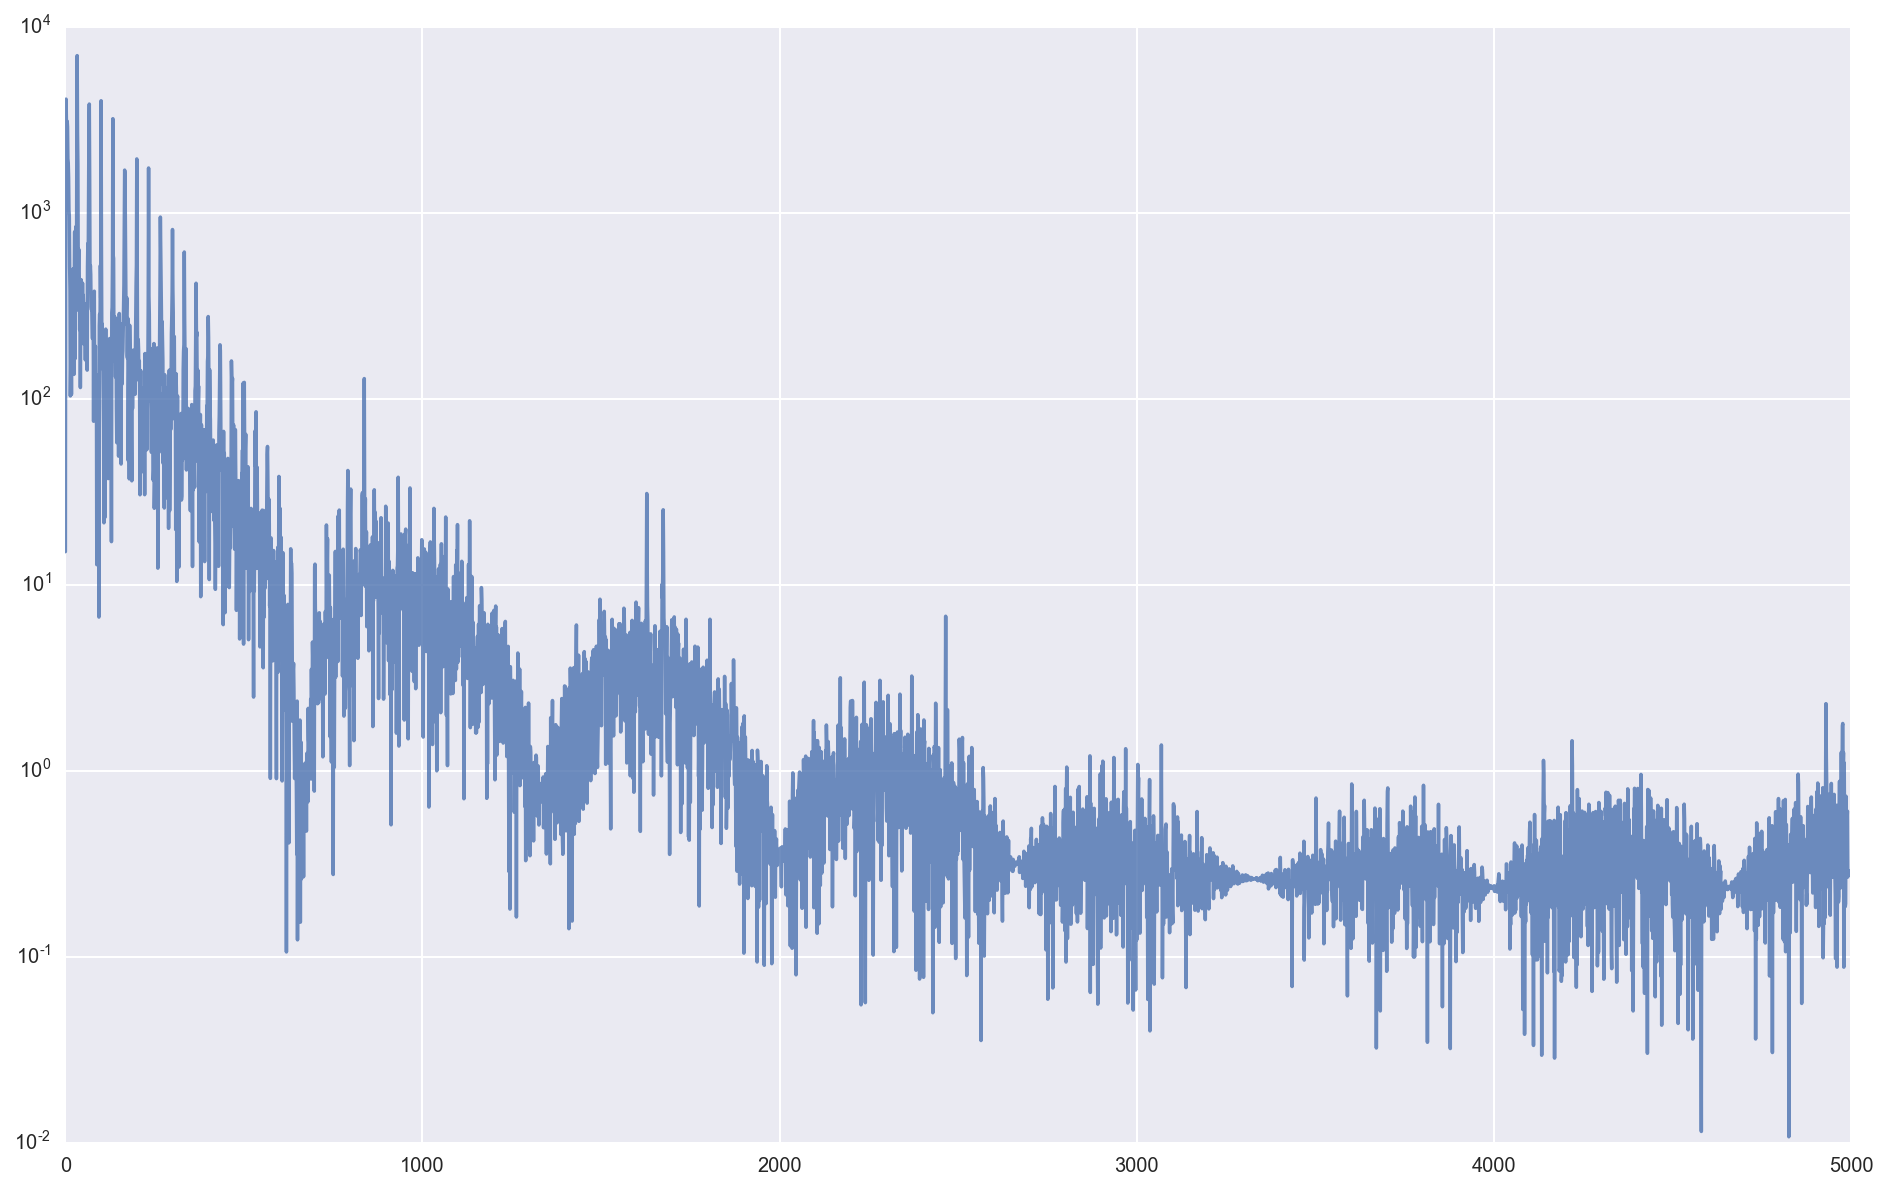

In [277]:
temp_hom = pd.DataFrame(temps[['CPU', 'GPU']].max(axis=1), columns=['temp']).resample('1s').mean().interpolate()
sample_temps = temp_hom.temp.iloc[:10000]

y = (sample_temps.rolling(15, center=True).mean() - sample_temps.mean()).dropna() #.resample('500ms').interpolate()
N = len(y)
frate = 1 #/sec           
Hn = np.fft.fft(y)
freqs = np.fft.fftfreq(len(Hn), frate) * N * frate
amplitudes = np.abs(Hn)
df_fft = pd.DataFrame([amplitudes[:N//2], freqs[:N//2]]).T.rename(columns={0:'ampl', 1:'freq'}).sort_values(by='ampl', ascending=False)

idx = np.argmax(amplitudes)
freq_in_hertz = freqs[idx]
print(freq_in_hertz, idx)

plt.figure(figsize=(16, 10))
plt.semilogy(amplitudes[:N//2], alpha=.8)

df_fft.head(10)

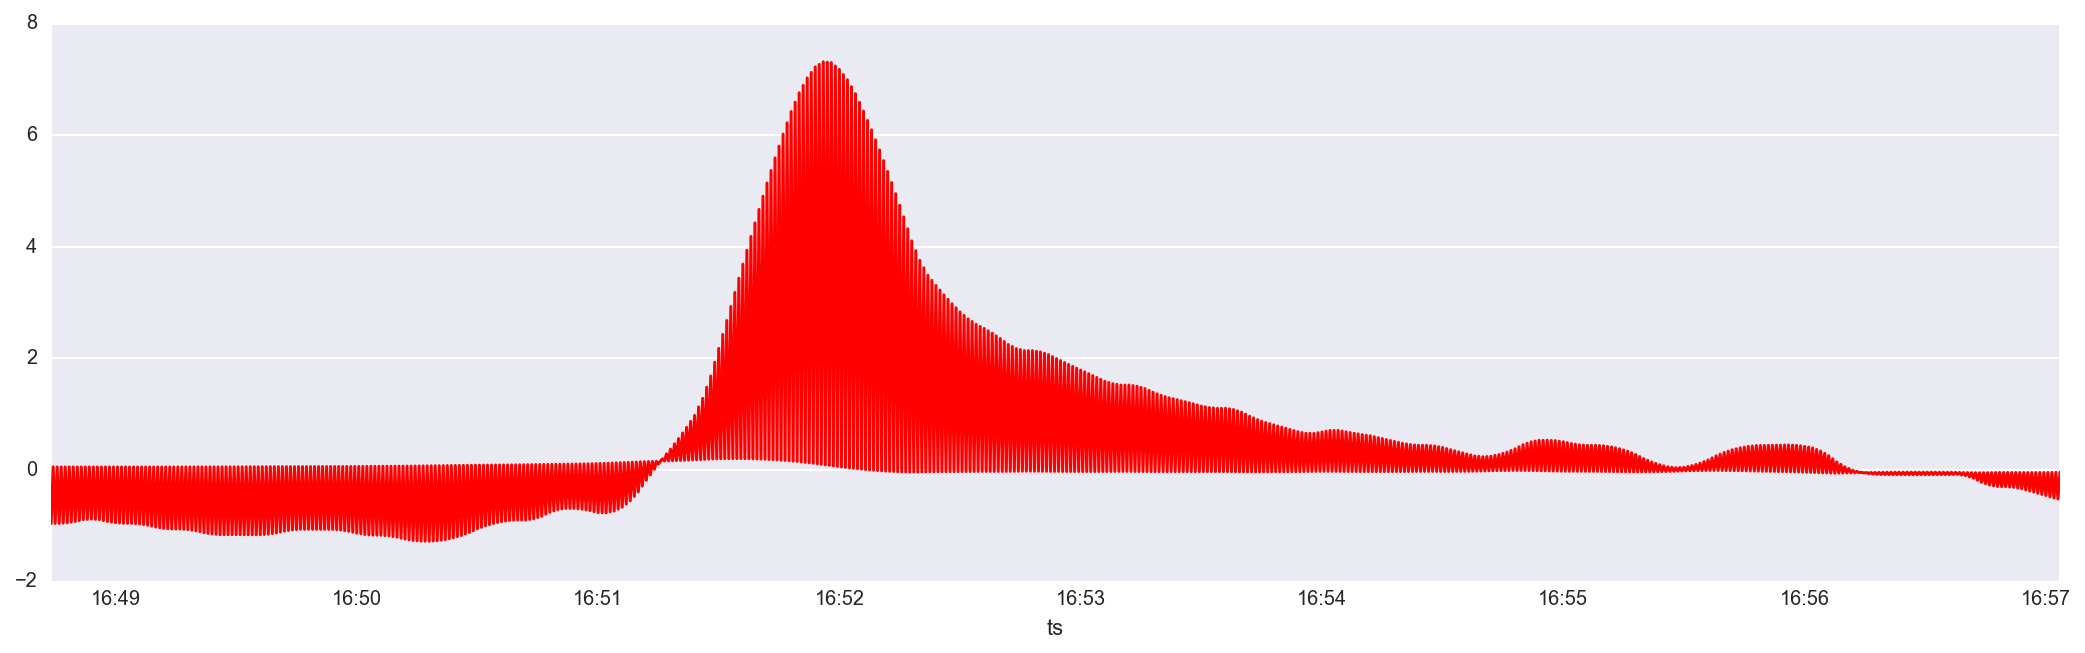

In [229]:
(pd.Series(np.fft.irfft(Hn)[:N], index=y.index)).iloc[:1000].plot(figsize=(18, 5), lw=1.5, color='r')
plt.show()

### Temperature **smoothing**

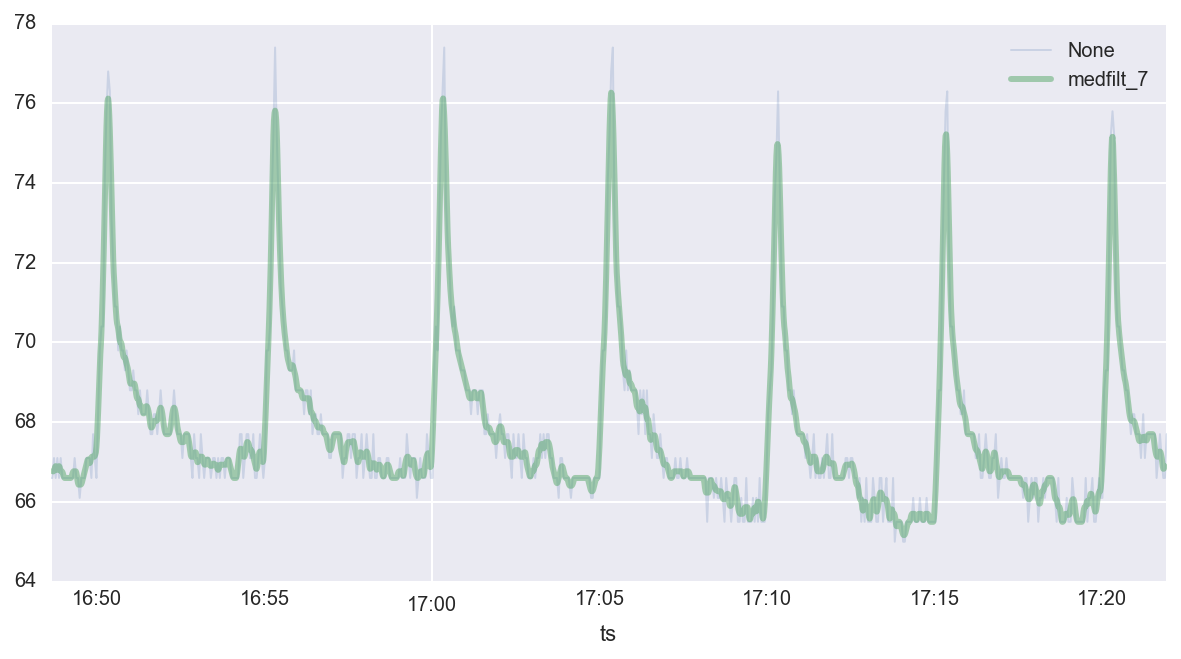

In [173]:
prueba = sample_temps.iloc[:2000]

ax = prueba.plot(figsize=(10, 5), lw=1, alpha=.2)
#pd.Series(medfilt(prueba, kernel_size=11), index=prueba.index, name='medfilt_7').plot(ax=ax, alpha=.5, lw=3)
prueba.rolling(9, center=True).mean().rename('medfilt_7').plot(ax=ax, alpha=.5, lw=3)
#pd.Series(medfilt(prueba, kernel_size=15), index=prueba.index, name='medfilt_15').plot(ax=ax, alpha=.5)
plt.legend();

### Timmings de tareas en LOG

In [27]:
timmings = loginfo[loginfo.msg.str.startswith('TIMEIT ')].dropna(axis=1, how='all')
timmings = timmings.join(timmings.msg.str.extract('TIMEIT (?P<func>.+) TOOK: (?P<took>\d{1,3}\.\d{1,3}) s', expand=True)
                        ).drop(['tipo', 'msg'], axis=1)
timmings.took = timmings.took.astype(float)
gb_timmings = timmings.groupby(['exec', 'func'])
print_cyan(gb_timmings.describe(percentiles=[.1, .9]))
timmings.head(10)

                                    CPU         GPU         took
exec func                                                       
1    _distribute_data count   26.000000   26.000000   137.000000
                      mean    69.126923   69.330769     0.480533
                      std      2.020407    2.433725     0.155733
                      min     64.500000   64.500000     0.240000
                      10%           NaN         NaN     0.281000
                      50%           NaN         NaN     0.465000
                      90%           NaN         NaN     0.645400
                      max     72.000000   73.100000     1.230000
     _make_index      count   43.000000   43.000000   185.000000
                      mean    69.323256   69.358140     0.573351
                      std      1.937455    2.125271     0.232228
                      min     66.600000   66.600000     0.243000
                      10%           NaN         NaN     0.313400
                      50%

/Users/uge/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,exec,CPU,GPU,func,took
ts,,,,,
2016-09-02 14:01:54,1,NaN,NaN,archive_periodic,0.017
2016-09-02 15:02:26,1,NaN,NaN,_distribute_data,1.230
2016-09-02 15:02:28,1,NaN,NaN,_make_index,1.791
2016-09-02 15:02:28,1,NaN,NaN,archive_periodic,4.738
2016-09-02 15:02:28,1,NaN,NaN,update_catalog,4.770
2016-09-02 15:02:28,1,NaN,NaN,_make_index,1.791
2016-09-02 15:02:28,1,NaN,NaN,archive_periodic,4.738
2016-09-02 15:02:28,1,NaN,NaN,update_catalog,4.770
2016-09-02 15:02:28,1,NaN,NaN,_make_index,1.791


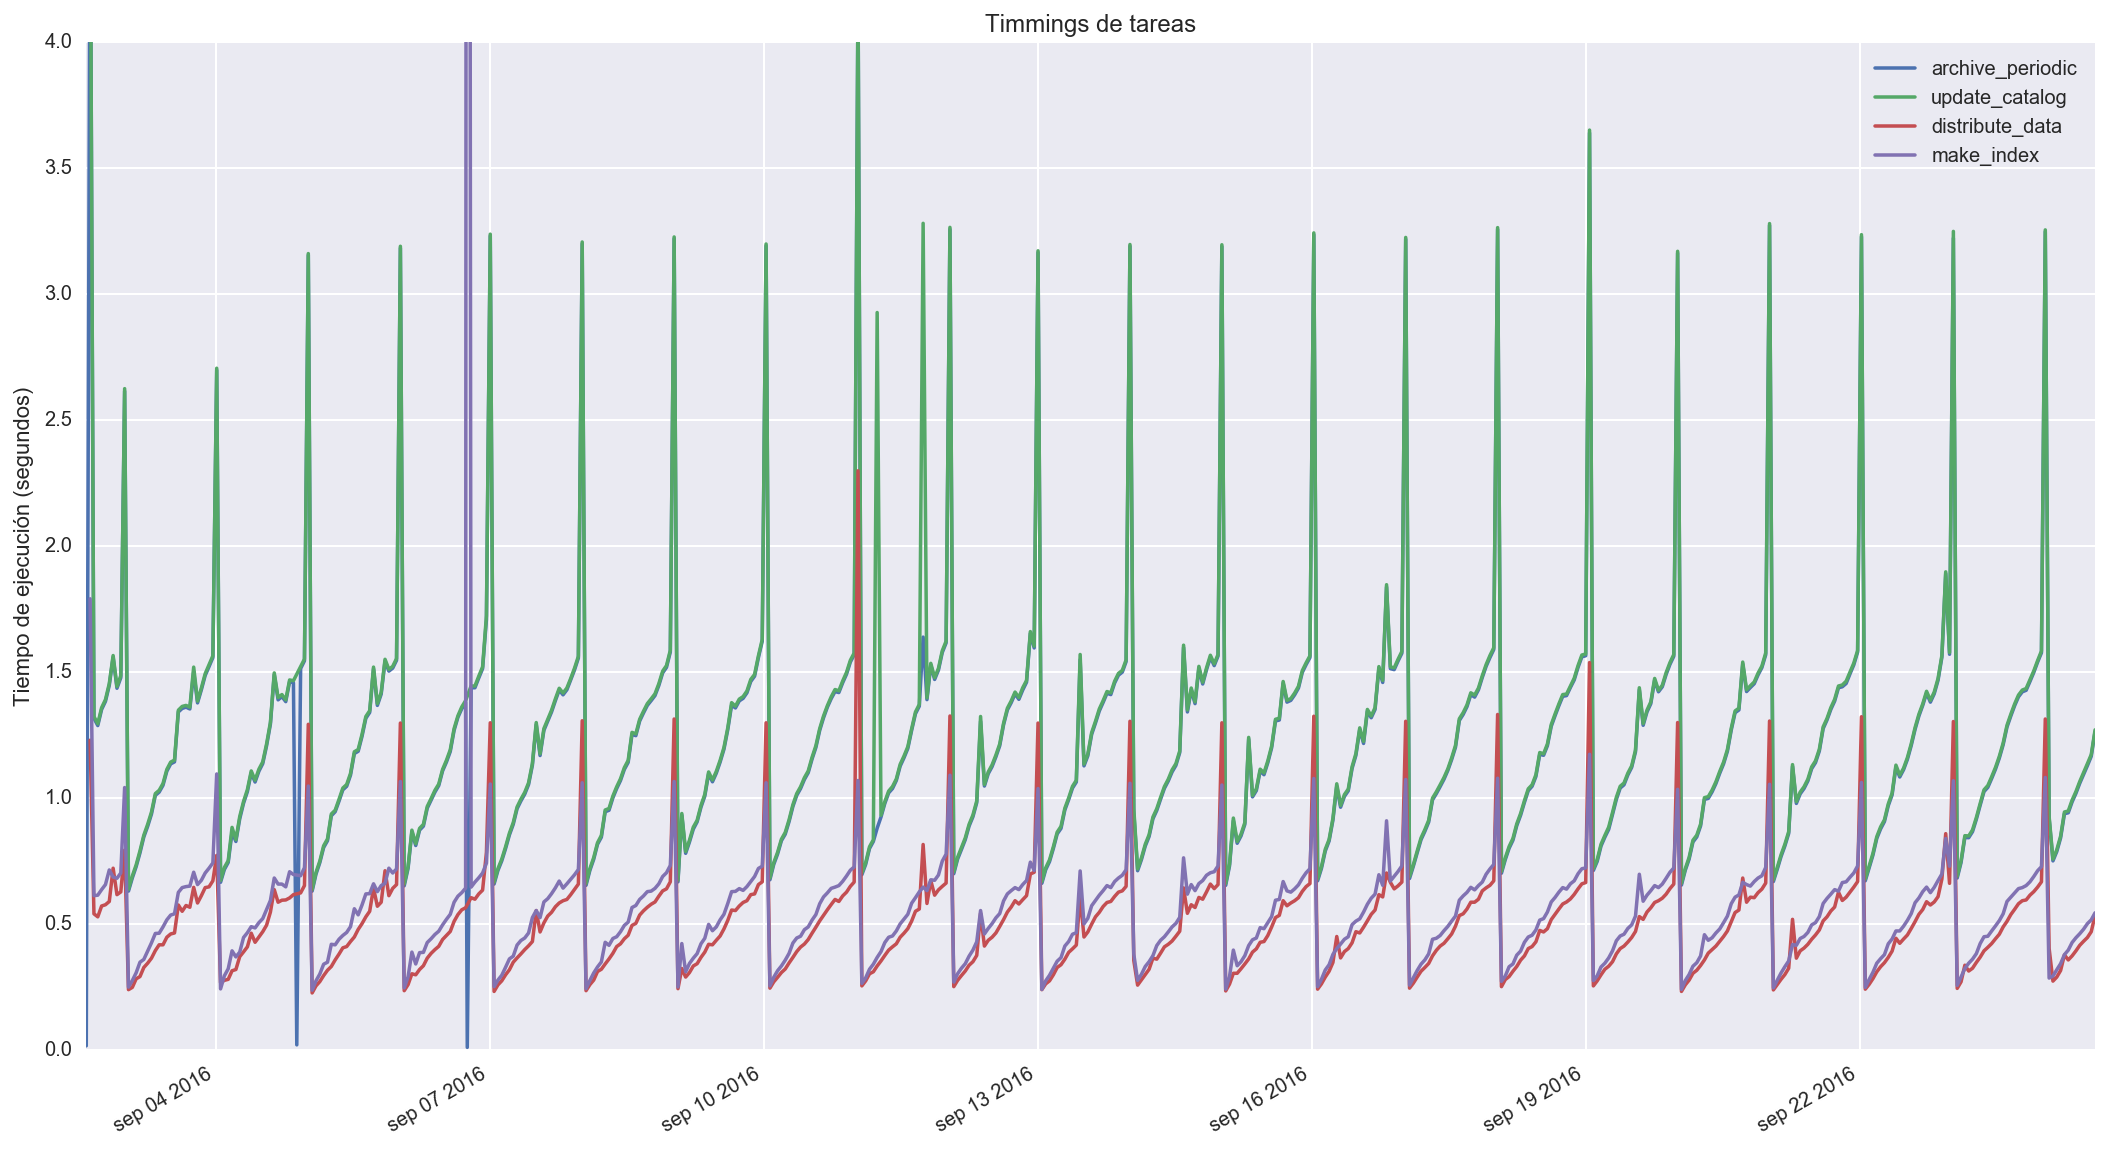

In [259]:
t_funcs = timmings.reset_index().set_index(['func', 'ts']).sort_index()
plt.figure(figsize=(18, 10))
for f in ['archive_periodic', 'update_catalog', '_distribute_data', '_make_index', ]:
    s = t_funcs.loc[f, 'took'].rename(f[1:] if f.startswith('_') else f)
    s.plot()
plt.ylim(0, 4)
plt.ylabel('Tiempo de ejecución (segundos)')
plt.xlabel('')
plt.title('Timmings de tareas')
plt.legend();